In [1]:
import numpy as np #çok boyutlu diziler,matrislerle çalışmak ve ileri düzey matematiksel işlem yapmak için kütüphane.
import pandas as pd #veri işlemesi ve ver analizi için kullanılan kütüphane.
import matplotlib.pyplot as plt #veri görselleştirilmesi için kullanılan pyhton kütüphanesi.
import seaborn as sns #istatiksel bir python veri görselleştirme kütüphanesidir.

In [54]:
from subprocess import check_output # subprocess standart girdi, çıktı ve hataları yönetmemizi sağlar.
print(check_output(["ls", "/Users/bestecetin/PycharmProjects/hafta1-datascience/archive"]).decode("utf8"))#archive içindeki .csv dosyalarını getirir.
import os
for dirname, _, filenames in os.walk("/Users/bestecetin/PycharmProjects/hafta1-datascience/archive"):#klasör ismi, ,klasördeki dosyaların ismi
    for filename in filenames: #dosya isimlerini döndürüyoruz.
        print(os.path.join(dirname, filename)) #bize bir path oluşturdu.
veri = pd.read_csv('/Users/bestecetin/PycharmProjects/hafta1-datascience/archive/pokemon.csv')#dosyayı okuyup bir değişkene attık.
    

combats.csv
pokemon.csv
tests.csv

/Users/bestecetin/PycharmProjects/hafta1-datascience/archive/combats.csv
/Users/bestecetin/PycharmProjects/hafta1-datascience/archive/pokemon.csv
/Users/bestecetin/PycharmProjects/hafta1-datascience/archive/tests.csv


In [55]:
veri.head() #head metoduyla veri setimizin ilk 5 kaydına bakıyoruz.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [196]:
veri #tamamını getirmek için

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Mega,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Mega,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Mega,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Mega,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Mega,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Mega,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Mega,Psychic,Dark,80,160,60,170,130,80,6,True


In [20]:
veri.info() #verilerin özelliklerini, sütun ve sayısı, boş olup olmadığını, veri tiplerini, ne kadar hafıza kullandığını gösterir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [21]:
veri.corr() #korelasyon bilgisini verir. 

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


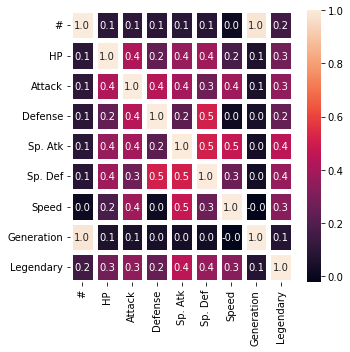

In [199]:
f,ax = plt.subplots(figsize=(5, 5)) #5,5 boyutunda karelerin olacağıno belirledik
sns.heatmap(veri.corr(), annot=True, linewidths=5, fmt= '.1f',ax=ax) #korelasyon matrisi oluşturduk  ısı haritası hangisi yoğun en koyu
plt.show() #karmaşıklık matrisi araştır
#fmt virgül sonraki sayıyla ilgili 
#figsize ısı harita şekil boyutu karelerin
#annot: hücre değerlerini yazma
#linewidth: satır aralığını değiştiriyor.
#ax=ax: 


In [23]:
veri.head(10) #verinin 10 elemanını listeledik

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [24]:
veri.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

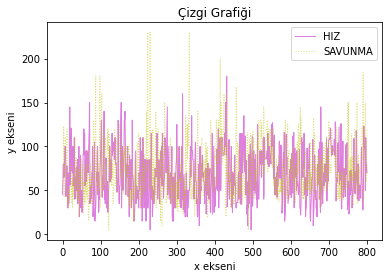

In [200]:
#MATPLOTLIB
#It is the basic python library for data visualization.
# Provides 2D and 3D visualization. While matplotlib is used in 2D drawing, other libraries are used in 3D.
veri.Speed.plot(kind = 'line', color = 'm',label = 'HIZ',linewidth=1,alpha = 0.5,grid = False,linestyle = '-')
veri.Defense.plot(color = 'y',label = 'SAVUNMA',linewidth=1, alpha = 0.5,grid = False,linestyle = ':') 
plt.legend(loc='upper right') #labeldaki verileri sağa doğru hizaladı
plt.xlabel('x ekseni')
plt.ylabel('y ekseni')
plt.title('Çizgi Grafiği')
plt.show()

Text(0.5, 1.0, 'Saldırı Savunma Dagilim Grafigi')

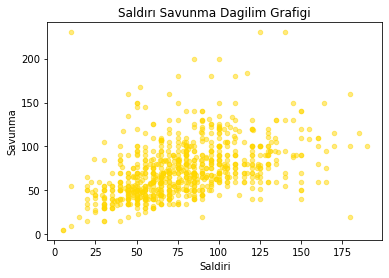

In [94]:
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'gold')
plt.xlabel('Saldiri')              # label = name of label
plt.ylabel('Savunma')
plt.title('Saldırı Savunma Dagilim Grafigi')    

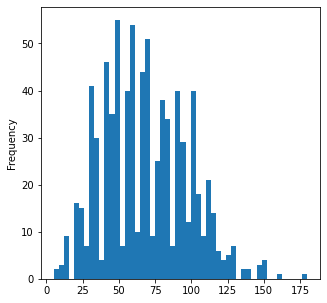

In [59]:
veri.Speed.plot(kind = 'hist',bins = 50,figsize = (5,5))
plt.show()

In [99]:
veri.Speed.plot(kind = 'hist',bins = 50)
plt.clf() #figure sildi. histogram figürünü

<Figure size 432x288 with 0 Axes>

In [105]:
#DICTIONARY
myDict={'sebze':'ispanak','besteci':'erik satie','meyve':'muz'}
print(myDict.keys())
print(myDict.values())

dict_keys(['sebze', 'besteci', 'meyve'])
dict_values(['ıspanak', 'erik satie', 'muz'])


In [116]:
myDict['besteci']="beste cetin" #veri güncellemesi
print(myDict)
myDict['atistirmalik']="cikolata" #yeni veri eklemek
print(myDict)
#del myDict['sebze'] #veri silme
print('meyve'in myDict) #myDict içinde meyve varsa True yoksa False döndürecek
myDict.clear() #tüm dictionary siler.
print(myDict)

{'besteci': 'beste cetin'}
{'besteci': 'beste cetin', 'atistirmalik': 'cikolata'}
False
{}


In [121]:
dizi=['Defense']
print(type(dizi))
veri_frame=veri[['Defense']]
print(type(veri_frame))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [122]:
#Karşılaştırma Operatörleri
print(8 > 5)
print(0!=123)
#Boolean operatörler
print(True and False)
print(True or False)

True
True
False
True


In [167]:
#Pandas Data Frame Filtreleme
myFilter=veri['HP']>250 #HP verisi 250den büyük olan datalar
veri[myFilter]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,262,Mega,Normal,NaN,255,10,10,75,135,55,2,False


In [166]:
myFilter2=veri['Name']=="Mega" #Name'i Mega olan datalar
veri[myFilter2]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Mega,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Mega,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Mega,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Mega,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Mega,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Mega,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Mega,Psychic,Dark,80,160,60,170,130,80,6,True


In [168]:
veri[np.logical_and(veri['Speed']>150,veri['Name']=="Mega")] #adı mega olan ve hızı 150'den yüksek olan datayı getir


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
315,316,Mega,Bug,Flying,61,90,45,50,50,160,3,False
431,432,Mega,Psychic,NaN,50,95,90,95,90,180,3,True


In [169]:
veri[np.logical_and(veri['Legendary']==True,veri['Attack']>160)] #Legendary True olan ve attack >160 olan data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,164,Mega,Psychic,Fighting,106,190,100,154,100,130,1,True
424,425,Mega,Ground,Fire,100,180,160,150,90,90,3,True
426,427,Mega,Dragon,Flying,105,180,100,180,100,115,3,True
429,430,Mega,Psychic,NaN,50,180,20,180,20,150,3,True
711,712,Mega,Dragon,Ice,125,170,100,120,90,95,5,True


In [170]:
#Filtereleme için '&'da kullanılabilir.
veri[(veri["Type 1"]=="Dragon")&(veri["Type 2"]=="Ice")] #Type1 Dragon ve Type2 Ice olan dataları getir.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
710,711,Mega,Dragon,Ice,125,130,90,130,90,95,5,True
711,712,Mega,Dragon,Ice,125,170,100,120,90,95,5,True
712,713,Mega,Dragon,Ice,125,120,90,170,100,95,5,True


In [175]:
#While Ve For Döngüleri
i=0
while i!=3: #i değişkenini 3'e eşit olana kadar arttıran ve eşit olduğunu söyleyen program.
    print("i =",i)
    i+=1
print(i,"eşittir 3'e")

i = 0
i = 1
i = 2
3 eşittir 3'e


In [203]:
myNumbers=[2,12,20,25,31,19,24] #dizideki elemanları yazdıran program.
for i in myNumbers:
    print("i =",i)

print("*********** ")

for index,value in enumerate(myNumbers):#dizinin index ve value değerlerini bir arada gösterdik.
    print(index,":",value)

print("**********")

myDict2={'istanbul':'kucukcekmece','antalya':'muratpasa'}#bir dictionary yazdırırken value ve key degerlerini for ile yazdırdık.
for key,value in myDict2.items():
    print(key,":",value)

print("**********")

for index,value in veri[['Type 2']][0:8].iterrows():#0. indexten 8. indexe kadar olan type2 sütunundaki 0dan 8e kadar veri getirdi.
    print(index," : ",value)


i = 2
i = 12
i = 20
i = 25
i = 31
i = 19
i = 24
*********** 
0 : 2
1 : 12
2 : 20
3 : 25
4 : 31
5 : 19
6 : 24
**********
istanbul : kucukcekmece
antalya : muratpasa
**********
0  :  Type 2    Poison
Name: 0, dtype: object
1  :  Type 2    Poison
Name: 1, dtype: object
2  :  Type 2    Poison
Name: 2, dtype: object
3  :  Type 2    Poison
Name: 3, dtype: object
4  :  Type 2    NaN
Name: 4, dtype: object
5  :  Type 2    NaN
Name: 5, dtype: object
6  :  Type 2    Flying
Name: 6, dtype: object
7  :  Type 2    Dragon
Name: 7, dtype: object
